In [1]:
import os
import numpy as np
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import warnings
from scipy import stats
from scipy.stats import skew, kurtosis
warnings.filterwarnings('ignore')
%matplotlib inline

if os.name == 'posix': # Mac 환경 폰트 설정
    plt.rc('font', family='AppleGothic')
elif os.name == 'nt': # Windows 환경 폰트 설정
    plt.rc('font', family='Malgun Gothic')

plt.rc('axes', unicode_minus=False) # 마이너스 폰트 설정

# 글씨 선명하게 출력하는 설정
%config InlineBackend.figure_format = 'retina'

In [2]:
data = pd.read_csv('dataset2.csv')

In [3]:
data

,성별코드,연령대코드(5세단위),신장(5Cm단위),체중(5Kg단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,...,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,당뇨여부,BMI
0,1,8,170,75,90.00000,1.00000,1.00000,1.00000,1.00000,120.00000,...,17.10000,1.00000,1.00000,21.00000,35.00000,40.00000,1.00000,1.00000,0.00000,26.00000
1,1,7,180,80,89.00000,0.90000,1.20000,1.00000,1.00000,130.00000,...,15.80000,1.00000,0.90000,20.00000,36.00000,27.00000,3.00000,0.00000,0.00000,25.00000
2,1,9,165,75,91.00000,1.20000,1.50000,1.00000,1.00000,120.00000,...,15.80000,1.00000,0.90000,47.00000,32.00000,68.00000,1.00000,0.00000,0.00000,28.00000
3,1,11,175,80,91.00000,1.50000,1.20000,1.00000,1.00000,145.00000,...,17.60000,1.00000,1.10000,29.00000,34.00000,18.00000,1.00000,0.00000,0.00000,26.00000
4,1,11,165,60,80.00000,1.00000,1.20000,1.00000,1.00000,138.00000,...,13.80000,1.00000,0.80000,19.00000,12.00000,25.00000,1.00000,0.00000,0.00000,22.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180115,1,13,165,65,84.00000,0.90000,1.20000,1.00000,1.00000,160.00000,...,15.20000,1.00000,1.00000,34.00000,12.00000,78.00000,1.00000,1.00000,0.00000,24.00000
1180116,1,8,180,65,77.00000,1.20000,1.20000,1.00000,1.00000,123.00000,...,15.90000,1.00000,1.00000,11.00000,8.00000,15.00000,3.00000,1.00000,0.00000,20.00000
1180117,2,14,155,55,83.00000,0.20000,0.60000,1.00000,1.00000,146.00000,...,12.40000,1.00000,0.70000,21.00000,15.00000,23.00000,1.00000,0.00000,0.00000,23.00000
1180118,2,14,155,55,84.00000,0.90000,1.20000,1.00000,1.00000,130.00000,...,12.90000,1.00000,0.80000,29.00000,14.00000,19.00000,1.00000,0.00000,0.00000,23.00000


## 언더샘플링


비율 : 0.04109158821780597


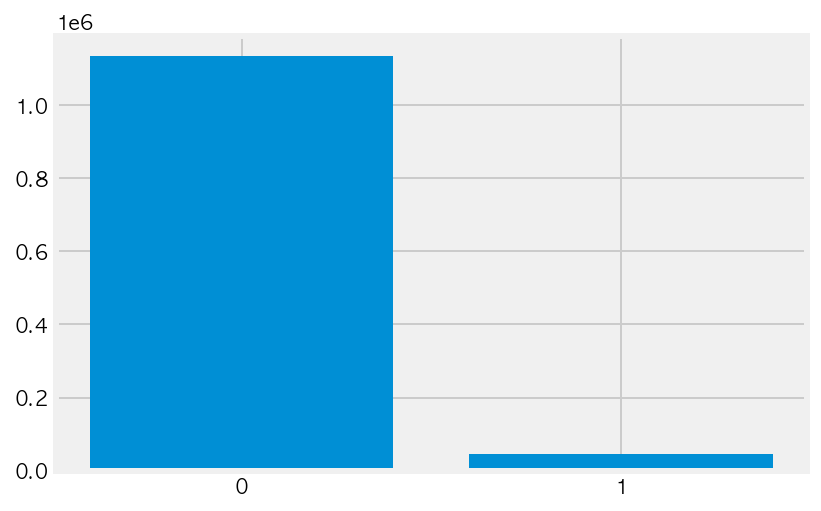

In [4]:
dang = data[data['당뇨여부']== 1].copy()
nodang = data[data['당뇨여부']== 0].copy()


plt.bar(np.arange(2),[len(nodang),len(dang)])
plt.xticks(np.arange(2),['0','1'])

print("비율 :",len(dang)/len(nodang))

In [5]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()


In [6]:
X = data[['허리둘레','연령대코드(5세단위)','감마지티피','수축기혈압','BMI']].copy()
Y = data[['당뇨여부']].copy()


def UnderSampling(ss):
    rus = RandomUnderSampler(sampling_strategy = ss)

    x_rus, y_rus = rus.fit_resample(X, Y)
    
    return x_rus, y_rus
    

In [8]:
# 당뇨 : 비당뇨 = 1:1 to 1:2
print("원본 데이터 당뇨 수", pd.get_dummies(Y).sum())

x_rus1, y_rus1 = UnderSampling(1)
x_rus08, y_rus08 = UnderSampling(0.8)
x_rus06, y_rus06 = UnderSampling(0.6)
x_rus04, y_rus04 = UnderSampling(0.4)
x_rus02, y_rus02 = UnderSampling(0.2)
# x_rus0, y_rus0 = UnderSampling(0)



print("랜덤 언더 샘플링(1) 후, 비당뇨 수(auto) ->",len(y_rus1[y_rus1['당뇨여부']==0]))
print("비율 :",len(y_rus1[y_rus1['당뇨여부']==1])/(len(y_rus1[y_rus1['당뇨여부']==0])))

print("랜덤 언더 샘플링(0.8) 후, 비당뇨 수(auto) ->",len(y_rus08[y_rus08['당뇨여부']==0]))
print("비율 :",len(y_rus08[y_rus08['당뇨여부']==1])/(len(y_rus08[y_rus08['당뇨여부']==0])))

print("랜덤 언더 샘플링(0.6) 후, 비당뇨 수(auto) ->",len(y_rus06[y_rus06['당뇨여부']==0]))
print("비율 :",len(y_rus06[y_rus06['당뇨여부']==1])/(len(y_rus06[y_rus06['당뇨여부']==0])))

print("랜덤 언더 샘플링(0.2) 후, 비당뇨 수(auto) ->",len(y_rus02[y_rus02['당뇨여부']==0]))
print("비율 :",len(y_rus02[y_rus02['당뇨여부']==1])/(len(y_rus02[y_rus02['당뇨여부']==0])))


원본 데이터 당뇨 수 당뇨여부   46579.00000
dtype: float64
랜덤 언더 샘플링(1) 후, 비당뇨 수(auto) -> 46579
비율 : 1.0
랜덤 언더 샘플링(0.8) 후, 비당뇨 수(auto) -> 58223
비율 : 0.8000103052058465
랜덤 언더 샘플링(0.6) 후, 비당뇨 수(auto) -> 77631
비율 : 0.6000051525807989
랜덤 언더 샘플링(0.2) 후, 비당뇨 수(auto) -> 232895
비율 : 0.2


In [9]:
def showbar(df_y): 
    dang = df_y[df_y['당뇨여부']== 1].copy()
    nodang = df_y[df_y['당뇨여부']== 0].copy()

    plt.bar(np.arange(2),[len(nodang),len(dang)])
    plt.xticks(np.arange(2),['0','1'])

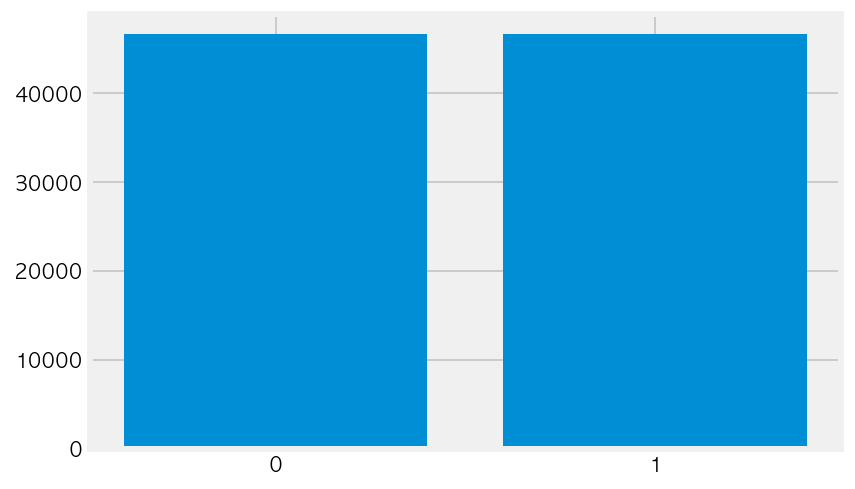

In [10]:
showbar(y_rus1)

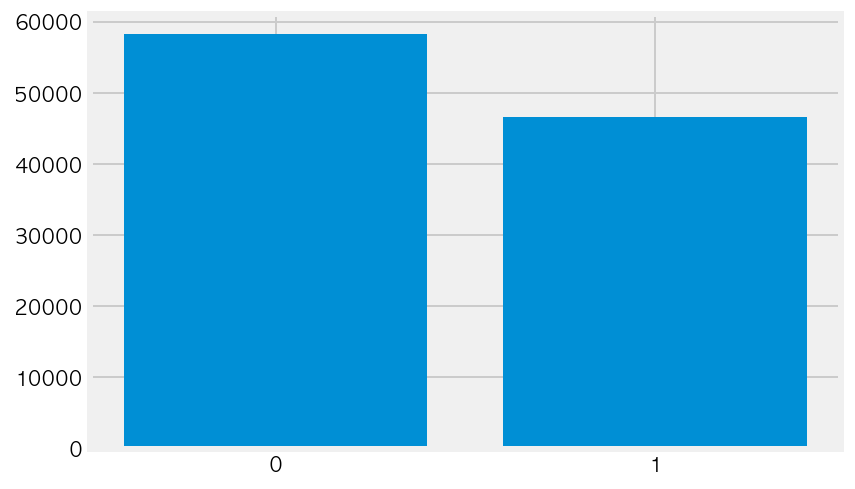

In [11]:
showbar(y_rus08)

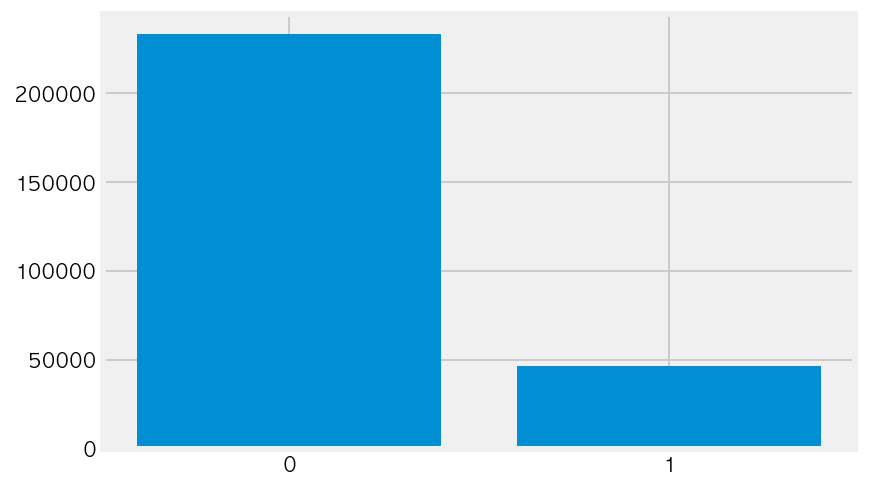

In [12]:
showbar(y_rus02)

## Logistic Regression
: 허리둘레, 연령대 코드, 감마지티피 + 수축기/ 이완기 혈압을 속성으로 진행

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler


In [14]:
S_scaler = StandardScaler()
R_scaler = RobustScaler()

In [18]:
## Features : 허리둘레, 연령대코드(5세단위), 감마지티피, 수축기혈압, 이완기혈압, BMI

def Logistic(x,y):
    LR_model = LogisticRegression()
    
    X_train, X_test, Y_train, Y_test = train_test_split(x, y, stratify=y, test_size=0.2, shuffle=True)
    # stratify=diabetes
    
    ## Data Scaling
    
    ## 1. StandardScaler
        # S_train_features = S_scaler.fit_transform(train_features)
        # S_test_features = S_scaler.fit_transform(test_features)
    
    ## 2. RobustScaler
    
    
    R_X_train = R_scaler.fit_transform(X_train)
    R_X_test= R_scaler.transform(X_test)
    
    LR_model.fit(R_X_train, Y_train)
    
    return LR_model, R_X_train, R_X_test, Y_train, Y_test

    

## 샘플링 별 평가 세트의 정확도 확인

In [21]:
## 학습, 평가 세트의 정확도 확인

# print(LR_model.score(S_train_features, train_labels))
# print(LR_model.score(S_test_features, test_labels))
print("---- 1")

lr1, r_x_train1, r_x_test1, y_train1, y_test1 = Logistic(x_rus1,y_rus1)
print(lr1.score(r_x_train1,y_train1))
print(lr1.score(r_x_test1, y_test1))

print("---- 0.8")

lr08, r_x_train08, r_x_test08, y_train08, y_test08 = Logistic(x_rus08,y_rus08)
print(lr08.score(r_x_train08,y_train08))
print(lr08.score(r_x_test08, y_test08))


print("---- 0.6")

lr06, r_x_train06, r_x_test06, y_train06, y_test06 = Logistic(x_rus06,y_rus06)
print(lr06.score(r_x_train06,y_train06))
print(lr06.score(r_x_test06, y_test06))

print("---- 0.4")

lr04, r_x_train04, r_x_test04, y_train04, y_test04 = Logistic(x_rus04,y_rus04)
print(lr04.score(r_x_train04,y_train04))
print(lr04.score(r_x_test04, y_test04))

print("---- 0.2")

lr02, r_x_train02, r_x_test02, y_train02, y_test02 = Logistic(x_rus02,y_rus02)
print(lr02.score(r_x_train02,y_train02))
print(lr02.score(r_x_test02, y_test02))



---- 1
0.686941470090975
0.6909081150708458
---- 0.8
0.6796316837823977
0.6861313868613139
---- 0.6
0.6856130746316722
0.6921745431124708
---- 0.4
0.7267903695752185
0.7249892657793044
---- 0.2
0.8309635520330622
0.8311655783164863


In [22]:
## coefficients 값 확인
## '허리둘레','연령대코드(5세단위)','감마지티피','수축기혈압','BMI'
print(lr1.coef_)
print(lr08.coef_)
print(lr06.coef_)
print(lr04.coef_)
print(lr02.coef_)


[[0.46498536 0.78568808 0.30297659 0.23441977 0.13084627]]
[[0.43467905 1.04818621 0.30381915 0.2225174  0.13626653]]
[[0.47612725 1.02007184 0.29234925 0.20439939 0.11050569]]
[[0.44240191 0.99535572 0.26166141 0.20239775 0.10773803]]
[[0.46608947 0.95539954 0.22905204 0.20676406 0.13610579]]


In [23]:
## '허리둘레','연령대코드(5세단위)','감마지티피','수축기혈압','이완기혈압', 'BMI'

Dong =  np.array([100.0, 14, 42.0, 140.0,31.0])
Hyuck = np.array([80.0, 12, 35.0, 120.0, 24.0])
Hee =   np.array([91.0, 11, 40.0, 130.0, 27.0])
Sue =   np.array([74.0, 10, 20.0, 130.0,  23.0])
Gu =    np.array([72.0, 7, 24.0, 120.0, 22.0])

sample_people = np.array([Dong, Hyuck, Hee, Sue, Gu])

In [24]:
sample_people = R_scaler.transform(sample_people)

In [25]:
print(lr1.predict(sample_people))
print(lr08.predict(sample_people))
print(lr06.predict(sample_people))
print(lr04.predict(sample_people))
print(lr02.predict(sample_people))

[1. 1. 1. 0. 0.]
[1. 1. 1. 0. 0.]
[1. 0. 0. 0. 0.]
[1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0.]


In [26]:
print(lr08.predict_proba(sample_people))

[[0.14170733 0.85829267]
 [0.47834369 0.52165631]
 [0.38689985 0.61310015]
 [0.68033745 0.31966255]
 [0.84520326 0.15479674]]


## TP FP FN FP 확인
 : 샘플 예측을 가장 잘 했다고 판단한 0.8 비율 언더샘플링을 기준으로 진행

In [51]:
y_pred1 = lr1.predict(r_x_test1)
y_pred08 = lr08.predict(r_x_test08)

In [57]:
is_correct = y_pred08 == y_test08.values
print(is_correct)

[[ True False  True ...  True False False]
 [False  True False ... False  True  True]
 [ True False  True ...  True False False]
 ...
 [False  True False ... False  True  True]
 [False  True False ... False  True  True]
 [False  True False ... False  True  True]]


In [58]:
np.mean(is_correct)

0.5090512009075054

In [59]:
print(len(y_test08))
print(sum(y_test08.values))

np.sum(y_pred08)

20961
[9316.]


8773.0

In [60]:
from sklearn import metrics


In [61]:
metrics.confusion_matrix(y_test08,y_pred08)  #[[TN, FP][FN, TP]]

array([[8627, 3018],
       [3561, 5755]])

In [62]:
# P = sum(y_test08)
# TP = sum((y_test08==1) & (y_pred08 ==1))
# TPR = TP/P

# FN = sum((y_test08==1) & (y_pred08 == 0))
# FNR = FN / P

# N =sum(y_pred08 == 0)

# print(P)
# print(TP)
# print(TPR)
# print(FN)
# print(FNR)

(tn, fp, fn, tp) = metrics.confusion_matrix(y_test08, y_pred08).ravel()

print(tn,fp,fn,tp)


8627 3018 3561 5755


## Fall-out , Precision, Recall, F_score
 : 당뇨가 아닌 사람을 당뇨라고 예측한 비율

In [63]:
## Fall-out 
fpr = fp / (tn+fp)
print("Fallout: ", fpr)


## Precision

precision = tp / (tp+fp)
print("Precision: ",precision)

## Recall

recall = tp / (tp+fn)
print("Recall: ",recall)

## F1 score

f_score = (precision * recall * 2) / (precision + recall)
print("F score: ",f_score)



Fallout:  0.2591670244740232
Precision:  0.6559899692237547
Recall:  0.6177544010304852
F score:  0.6362983028359777


In [79]:
## ROC curve

# def roc_curve_plot(y_test , pred_proba_c1):
#     # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
#     fprs , tprs , thresholds = metrics.roc_curve(y_test ,pred_proba_c1)

#     # ROC Curve를 plot 곡선으로 그림. 
#     plt.plot(fprs , tprs, label='ROC')
#     # 가운데 대각선 직선을 그림. 
#     plt.plot([0, 1], [0, 1], 'k—', label='Random')
  
#     # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
#     start, end = plt.xlim()
#     plt.xticks(np.round(np.arange(start, end, 0.1),2))
#     plt.xlim(0,1)
#     plt.ylim(0,1)
#     plt.xlabel('FPR( 1 - Sensitivity )')
#     plt.ylabel('TPR( Recall )')
#     plt.legend()
#     plt.show()
    
    
def roc_curve_plot(y_test , pred_proba_c1):
    # 임곗값에 따른 FPR, TPR 값을 반환 받음. 
    fprs , tprs , thresholds = metrics.roc_curve(y_test ,pred_proba_c1)

    # ROC Curve를 plot 곡선으로 그림. 
    plt.plot(fprs , tprs, label='ROC')
    # 가운데 대각선 직선을 그림. 
    plt.plot([0, 1], [0, 1], "k--", label='Random')
  
    # FPR X 축의 Scale을 0.1 단위로 변경, X,Y 축명 설정등   
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )')
    plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
  



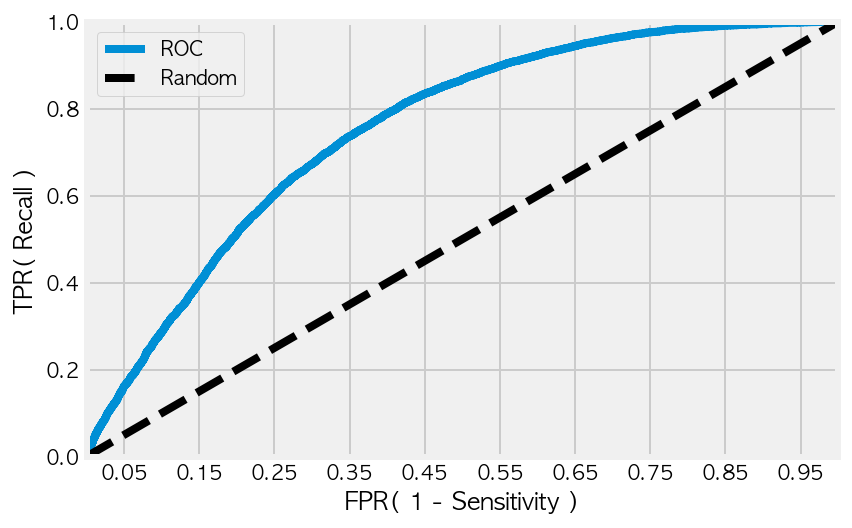

In [78]:
# lr_proba = lr08.predict_proba(r_x_test08)[:, 1]

# roc_curve_plot(y_test, lr_proba)

roc_curve_plot(y_test08, lr08.predict_proba(r_x_test08)[:, 1]) 


In [81]:


roc_auc = metrics.roc_auc_score(y_test08, lr08.predict_proba(r_x_test08)[:, 1])

print('ROC/AUC VAL: {0:.4f}'.format(roc_auc))

ROC/AUC VAL: 0.7525
